In [1]:
using PyPlot
using Distributions
using StatsBase

In [3]:
using FakeGeno

In [70]:
pop = make_pop(1200,2000,100)

generate sample population ....

# inidviduals  : 2058
# chromosomes  : 4116
# SNPs         : 1024
# generations  : 16464   (4.0 x char. decay)
# hotspots     : 100

mutationrate set to 0.00014166312793188626
corresponding to average heterozygosity : 0.35
evolving population ...100% Time: 0:10:35


1024x4116 Array{Bool,2}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false   true     false  false  false  false  false
  true   true   true   true   true      true   true   true   true   true
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false   true     false  false   true  false  false
 false  false  false   true  false  …  false  false  false  false   true
 false  false  false   true  false     false  false  false  false  false
 false   true   true  false  false      true   true  false  false   true
  true  false  false   true   true      true  false   true  false   true
 false  false  false  false  false      true   true  false   true   true
 false   true  false  false  false  …  false  false  false  false  false
 false  false   true  false  false     false   true  false  false  false
 false   true  false  false   true     false  false  false   true   true
     ⋮                    

In [ ]:
convertrtc

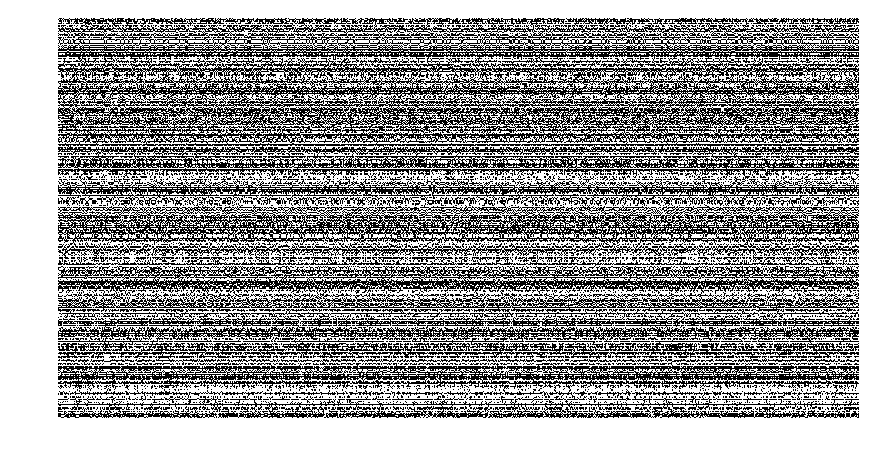

In [16]:
showmatrix(pop);

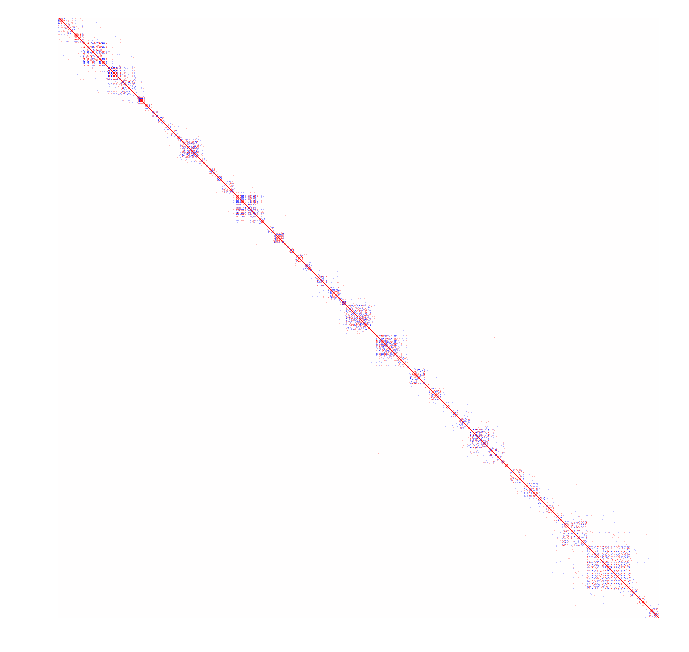

In [17]:
COR = cor(pop,2)
COR[abs(COR) .< .25] = 0
showmatrix(COR,cmap="bwr",minmax=[-1.,1.]);

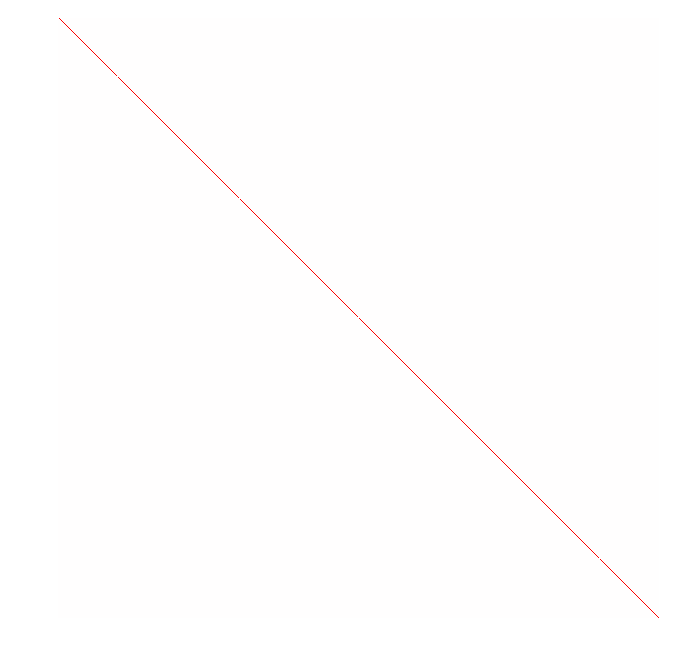

In [28]:
pop2 = rand(Nsnp, 2000).<0.5
COR = cor(pop2,2)
COR[abs(COR) .< .25] = 0
showmatrix(COR,cmap="bwr",minmax=[-1.,1.]);

In [53]:
Nsnp = size(pop)[1]
Nrisk = Int(0.01*Nsnp)
risk = zeros(Bool,Nsnp)
loc = sort!(FakeGeno.sample(1:Nsnp,Nrisk,replace=false))
risk[loc]=true

dosage = calc_dosage(pop2);
score = Int[]
for i in 1:size(dosage)[2]
    push!(score, dot(risk, dosage[:,i]))
end

thresh = quantile(score)[3]
cases = score .> thresh;
zscores = GWAS(pop2, cases);

In [57]:
sum(cases) / length(cases)

0.441

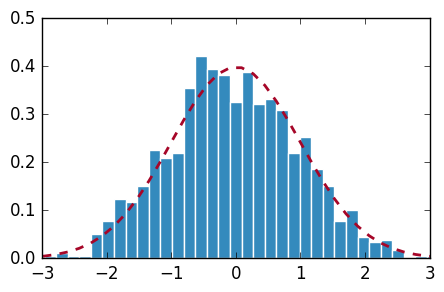

In [58]:
zhist(zscores);

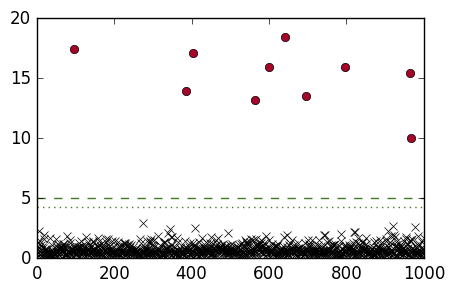

In [59]:
manhattanplot(zscores, risk);

In [23]:
minimum(zscores[risk])

1.1539044195604922

In [ ]:
sum(risk)

In [ ]:
Vector([1, 2])

In [ ]:
a = BitArray(10)

In [ ]:
~a

In [66]:
sum(BitArray(43))

0